<a href="https://colab.research.google.com/github/elizacarling-liliz/In_progress_Eliza_Carling/blob/main/S4_2025_STUDENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

## Overview of the session
1. Introduction to Machine learning concepts
2. Introduction to creating and training Neural Networks

## What is Machine Learning?

Machine learning is the study of algorithms that allow computers to learn and make decisions from data without explicit programming.

There are three broad types of machine learning:

*  **Supervised Learning**: Learning from labeled data (e.g., regression, classification).
*  **Unsupervised Learning**: Learning from unlabeled data (e.g., clustering, dimensionality reduction).
* **Reinforcement Learning**: Learning by interacting with an environment to maximize a reward.



**Task: Label the following as an example of either a supervised, unsupervisied or reinforcement learning problem**



1.   Training an AI agent to play and win a strategy-based game e.g. chess or go
2.   Predicting whether a customer will cancel their subscription based on their usage history.
3. Grouping customers into similar groups based on purchasing behavior.
4. Enabling a robot to move through a maze to reach a goal.
5. Teaching a car to navigate and make driving decisions in a simulated or real environment.
6.  Classifying emails as "spam" or "not spam" based on labeled historical data.
7. Predicting the price of a house given historical sales data.



In [ ]:
# your answer

## Supervised Machine Learning

Supervised learning is a type of machine learning where the model learns a mapping from inputs (features) to outputs (labels) based on a labeled dataset. In other words, the model is "supervised" because it learns from a dataset where the correct answers (output labels) are already known.

## Classification vs Regression

**Classification** and **regression** are two main types of supervised learning tasks in machine learning.

**Classification**:
The task of predicting discrete labels or categories. The output belongs to a predefined set of classes.

Example: Determining if an email is spam (Yes/No).

**Regression**:
The task of predicting a continuous numerical value. The output can take any value within a range.

Example: Predicting house prices based on square footage and location e.g. £154,000

**Task: Label the following as an example of either a classification or  regression problem**



1.   Predict the monthly revenue of a store.
2.  Identify whether an image contains a specific object (e.g., cat, car, tree).
3.  Predict whether a patient has a particular disease based on medical test results.
4.  Identify the digit (0-9) written in an image.
5. Predict the temperature for the next day in a given location.

In [ ]:
# your awnser

### Logistic Regression

The simplest machine learning algorithm for classification problems is logistic regression.

Logistic regression is fundamentally a linear function that predicts the probability that a datapoint belongs to a particular class. This can be **binary** classification where they are only two outcomes (e.g., "Yes/No", "Spam/Not Spam") or multiclasss classification, where there are multiple class labels (e.g., "Dog"/"Cat"/"Mouse", "Pneumonia"/"Asthma"/"COPD"/"Cystic Fibrosis").

We will use the Winsconsin breast cancer dataset from last week as an example to work through a logistic regression problem. The dataset has 30 features (each column) which are radiological descriptions of a patient's breast tumour. Each row represents an individual patient. There are 569 patients in total in this dataset. We want to use the features to predict whether a tumour is benign (0) or malignant (1) based on the given features.

In [ ]:
import pandas as pd
from sklearn import datasets
x = datasets.load_breast_cancer()
feature_names = list(x.feature_names)
data = pd.DataFrame(x.data, columns=feature_names)
target = x.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## ML Workflow

Our goal is to build a model that is good at making predictions on unseen data. In the case of logistic regression, we need to build a linear model that takes the features as inputs and predicts the class the datapoint belongs to. In order to do this we learn a set of parameters called weights and biases for each feature that best predicts the output class.

1. We first initialize the weight and bias values for each feature randomly.

Below is a generalized linear equation for logistic regression given a set of features $x_{1}$ to $x_{n}$, where $z$ is the probability that a feature belongs to a certain class.

$$𝑧=𝑤_{1}𝑥_{1}+𝑤_{2}𝑥_{2}+...+𝑤_{𝑛}𝑥_{𝑛}+𝑏$$

In the case of our Breast cancer dataset this would look something like:

$$probability\,of\,malignancy =𝑤_{1}*mean\,radius+𝑤_{2}*mean\,texture\,+...+\,𝑤_{30} *worst\,fractal\,dimension+𝑏$$
2. Then we apply a sigmoid (in the case of binary classification) or softmax (in the case of multiclass classification) function to the calculated output in order to obtain a probability i.e. to ensure the outputs are values in the range of 0 and 1 and in the case of multiclass classification, this also means that the predicted probabilties for each class all add up to 1.

$$σ(x) =  \frac{\mathrm{1} }{\mathrm{1} + e^-x }  $$
​$$

3. We assign the predicted probability to a given class according to a threshold we set e.g.

$$Class\, 1\, if\, σ > 0.5
\\
Class\, 0\, otherwise
$$
4. We then see if our predicted class is the same as the true class using a loss function e.g. binary cross entropy.
5. The weights and biases are then automatically tweaked using a method called gradient descent to minimize the loss and bring predictions more in like with the true outputs.
6. When a prediction has been made for every datapoint in the training dataset, this is known as an epoch.
7. Steps 1-5 repeat multiple times until some stopping criteria has been met e.g. the value of the loss is lower than a certain threshold, we have run the algorithm for a certain number of epochs etc.

To learn more about logistic regression in detail, you may find this [video](https://www.youtube.com/watch?v=yIYKR4sgzI8) helpful.

### Steps for Logistic Regression

In order to predict an outcome using logistic regression we must:

1. Import relevant functions
2. Split the dataset into training and test sets
3. Instantiate a logistic regression model
4. Train model using the train data
5. Calculate the Models performance using the test data

First we need to import the relevant functions from the python sci-kit learn library. We are importing the logistic regression model and the functions for evaluating our model i.e. accuracy and confusion matrix.

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

We split the data into train and test sets to see how well our model performs on unseen data. X refers to the input features and y is the label. A test_size of 0.2, means that 20% of our data is reserved for testing while 80% is reserved for training. It is helpful to set a value for the random_state when splitting data to ensure that the results will be reproducible, but ensure you set the same number each time.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

As the features have different scales e.g. mean area is in the 100s scale, whereas mean compactness in the $10^{-1}$ scale we first need to normalize the data. We do this using the standard scaler.

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

We can simply instatiate a logistic regression model by calling the LogistRegression class from the sklearn library. We use the "fit" method to train the model on the training data.

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Print the coefficients
print("Coefficients:", lin_reg.coef_)

### Evaluation

To evaluate how well our model is performing we can use our model to make predictions on the unseen test data, and compare our model's predicted labels to the true labels. Using a confusion matrix gives us insight beyond just accuracy as we can see how well our model is predicting each class.

### Metrics:

#### Accuracy
**Definition**: Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of the total predictions.

**Formula:**

$$ Accuracy=\frac{True Positives+True Negatives}{Total Samples}$$

**Use Case:** Works well when classes are balanced but can be misleading for imbalanced datasets.

\\

#### Precision

**Definition**: Precision quantifies the proportion of correctly predicted positive instances out of all instances predicted as positive.

**Formula:**

$$Precision=\frac{True Positives+False Positives}{True Positives}$$


**Use Case**: Focused on minimizing false positives, important in applications like spam detection or medical diagnoses.

\\

#### Recall (or Sensitivity)

**Definition**: Recall measures the proportion of correctly predicted positive instances out of all actual positive instances.

**Formula:**
$$Recall= \frac{True Positives+False Negatives}{True Positives}$$
​

**Use Case**: Useful when it’s crucial to minimize false negatives, such as in disease detection.

\\

#### Specificity

**Definition:** Specificity measures the proportion of correctly predicted negative instances out of all actual negative instances.

**Formula:**
$$Specificity= \frac{True Negatives+False Positives}{True Negatives}$$
​

**Use Case:** Important when focusing on minimizing false positives, such as in fraud detection systems.

\\

#### F1

**Definition:** The F1 score is the harmonic mean of precision and recall, balancing both metrics. It’s a single score that combines the two.

**Formula:**

$$F1\, Score=2* \frac{Precision+Recall}{Precision⋅Recall}$$
​

**Use Case:** Especially useful for imbalanced datasets where precision and recall need to be balanced.

These ratios and metrics are neatly summarised in this table https://en.wikipedia.org/wiki/Confusion_matrix#Table_of_confusion

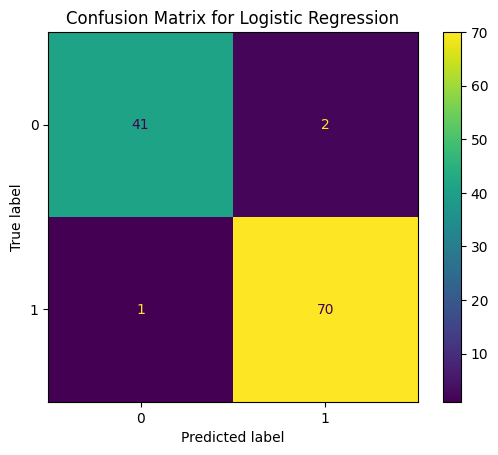

Accuracy: 97.37%
Precision: 0.97
Recall (Sensitivity): 0.99
F1 Score: 0.98
Specificity: 0.95


In [ ]:
# Predict
y_pred = log_reg.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Also sensitivity
f1 = f1_score(y_test, y_pred)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")


## Linear Regression

For regression problems, linear regression is the simplest model and similarly to logistic regression assumes a linear relationship between the predictor variables and the outcome. The only difference is we do not apply a softmax or sigmoid function to the calculated linear equation.

**Task: Make a linear regression model to predict diabetes using the scikit learn diabetes data set.**

In [ ]:
# your answer

### Limitations of Linear and Logistic regression

The underlying assumption of linear and logistic regression is that there is a linear relationship between the features and the predictor variable. This is not always the case and therefore these models can perform poorly on data with more complex relationships with the predictor variables. Non-linear models such as support vector machines, tree based models and neural networks can be more useful for these type of data.





## Introduction to Artificial Neural Networks: Key Concepts
### 1. Structure of ANNs
ANNs are composed of layers:
<br>
<br>
**Input Layer**: Receives input data.
<br>
**Hidden Layers**: Perform transformations on the data.
<br>
**Output Layer**: Produces predictions or classifications.
<br>
<br>
Each layer contains neurons, and the connections between neurons are associated with weights, which the network learns during training.

### 2. Tensors in PyTorch
In PyTorch, [tensors](https://www.youtube.com/watch?v=L35fFDpwIM4&t=94s) are the fundamental data structure used to represent the data fed into the network and the parameters (weights and biases) of the model. Tensors are multi-dimensional arrays similar to NumPy arrays but optimized for GPU acceleration, enabling faster computation for large datasets and complex models.

### 3. Learning Process
The learning process in an ANN involves adjusting the weights of the network to minimize a loss function, which quantifies the error between the predicted output and the actual target.

#### Forward Pass:
Input data flows through the network, producing predictions.
Non-linear [activation functions](https://www.youtube.com/watch?v=s-V7gKrsels&t=85s) like ReLU (Rectified Linear Unit) introduce non-linearity, allowing the network to learn complex patterns. The ReLU function is defined as:
<br>
$$𝑓(𝑥)=max(0,𝑥)$$

#### Loss Function:
A [loss function](https://www.youtube.com/watch?v=hnEjDGhd1Zw), such as [Mean Squared Error (MSE)](https://www.youtube.com/watch?v=tJpzKILW-Kg&t=23s) for regression or [Cross-Entropy Loss](https://www.youtube.com/watch?v=6ArSys5qHAU) for classification, measures the prediction error.

#### Backward Propagation:
Using [gradient descent](https://www.youtube.com/watch?v=sDv4f4s2SB8), the network computes the gradients of the loss function with respect to the weights. These gradients indicate how the weights should be adjusted to reduce the error.

#### Optimizer:
An [optimizer](https://www.youtube.com/watch?v=MD2fYip6QsQ), like Stochastic Gradient Descent (SGD) or Adam, updates the weights based on the gradients.

### 4. Training Process
The training process involves the following components:

#### Epochs:
An epoch represents one complete pass through the entire training dataset.

#### Batch Size:
To improve efficiency, the data is divided into smaller subsets called batches. The model processes one batch at a time during training.

#### [Overfitting and Underfitting](https://www.youtube.com/watch?v=nt5DwCuYY5c):
Overfitting occurs when the model learns the training data too well, including noise, leading to poor generalization on unseen data.
Underfitting occurs when the model is too simple to capture the underlying patterns in the data.

### 5. Classes and Object-Oriented Programming in PyTorch
In PyTorch, neural networks are implemented using [classes](https://www.youtube.com/watch?v=wfcWRAxRVBA) in Python. This approach leverages object-oriented programming (OOP) to create reusable and modular code. A typical neural network class inherits from [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).


In order to make a neural network model, just as before we need to:

1. Import the necessary packages
2. Split the dataset into training, **validation** and test sets
3. Create a neural network model
4. Train the model using the train data
5. Evaluate the Models performance using the test data

First we import the necessary packages. Pytorch is a deeplearning framework that makes it easier to build and evaluate deep learning modules. You can learn more about pytorch directly from the [docs](https://pytorch.org/docs/stable/index.html) or from watching some introduction [videos](https://www.youtube.com/watch?v=V_xro1bcAuA).

In [ ]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

Similarly to before we want to split the data into train and test sets, but additionally we will now also have a validation set to observe how the model is performing as the weights are updated.

In [ ]:
# Split dataset into training (60%), validation (20%) and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(data, target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Tensors

A tensor is an important concept in neural networks. This [link](https://www.youtube.com/watch?v=L35fFDpwIM4&t=94s) has more information about tensors and their use in deep learning computation.

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for PyTorch
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

### Model Building

Now we will build the actual neural network using pytorch's neural network [module](). As described above, a neural network has an input and output layer with a variable number of hidden layers. [Activation functions]() like relu are used to introduce non-linearity into the network otherwise it would be a simple linear model.

In [ ]:
# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 16)  # Input layer -> Hidden layer 1
        self.fc2 = nn.Linear(16, 8)  # Hidden layer 1 -> Hidden layer 2
        self.fc3 = nn.Linear(8, 1)   # Hidden layer 2 -> Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation to the second layer
        x = self.fc3(x)
        return x

### Loss functions and Optimisers

The binary cross entropy loss is used when there are two classes and the Adam optimizer is a popular optimizer used to update the weights of the model.

In [ ]:
# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Model Training Loop

In order to train the neural network we first define the number of epochs, the batch size which is the number of data points we want the neural network to see before the model parameters are updated. We store the training and validation loss values for plotting.

In [ ]:
# Training the model
epochs = 50
batch_size = 32
train_size = X_train_tensor.size(0)
val_size = X_val_tensor.size(0)

train_loss_values = []  # Store training loss values
val_loss_values = []    # Store validation loss values

for epoch in range(epochs):
    model.train()  # Set model to training mode
    epoch_train_loss = 0.0  # Track total loss for the epoch

    # Training loop
    for i in range(0, train_size, batch_size):
        X_batch = X_train_tensor[i:i + batch_size]
        y_batch = y_train_tensor[i:i + batch_size]

        optimizer.zero_grad()  # Clear gradients
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, y_batch)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        epoch_train_loss += loss.item()

    avg_train_loss = epoch_train_loss / (train_size / batch_size)  # Average loss per batch
    train_loss_values.append(avg_train_loss)

    # Validation loop
    model.eval()  # Set model to evaluation mode
    epoch_val_loss = 0.0
    with torch.no_grad():
        for i in range(0, val_size, batch_size):
            X_batch = X_val_tensor[i:i + batch_size]
            y_batch = y_val_tensor[i:i + batch_size]
            outputs = model(X_batch)  # Forward pass
            loss = criterion(outputs, y_batch)  # Compute validation loss
            epoch_val_loss += loss.item()

    avg_val_loss = epoch_val_loss / (val_size / batch_size)  # Average loss for validation set
    val_loss_values.append(avg_val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

### Visualising the Training and Validation Loss Curves

Here we can see how well the model performed on both the training and validation data. We care more about how the model performed on the validation data as it is a useful predictor of how the model performs on unseen data. We want both curves to eventually converge (level off). It is expected that the validation curve is usually slightly higher than the training curve.

In [ ]:
# Plot training and validation loss
plt.plot(range(1, epochs + 1), train_loss_values, label="Training Loss", color="blue")
plt.plot(range(1, epochs + 1), val_loss_values, label="Validation Loss", color="red")
plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Evaluating Model Performance

Epoch [10/50], Train Loss: 0.5411, Val Loss: 0.5009
Epoch [20/50], Train Loss: 0.3614, Val Loss: 0.2967
Epoch [30/50], Train Loss: 0.3212, Val Loss: 0.2479
Epoch [40/50], Train Loss: 0.3003, Val Loss: 0.2162
Epoch [50/50], Train Loss: 0.2867, Val Loss: 0.2055


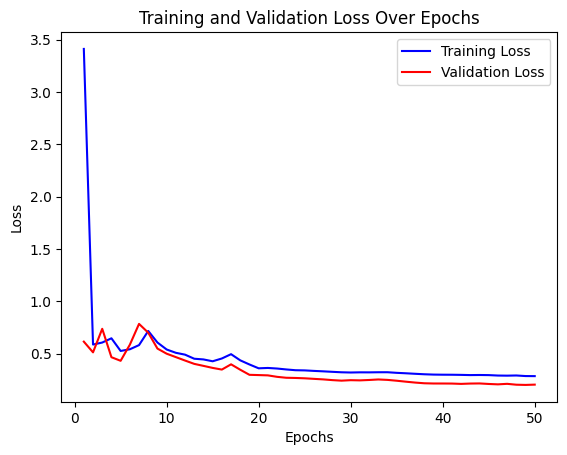

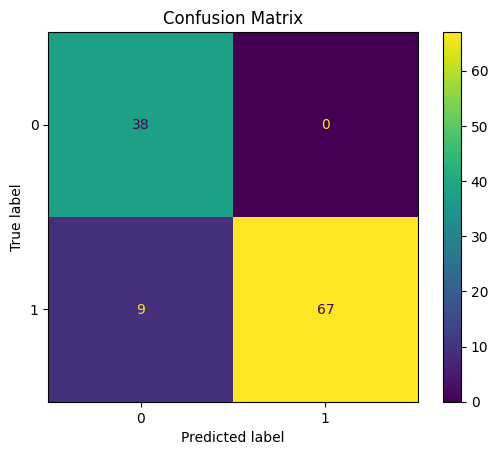

Accuracy: 92.11%
Precision: 1.00
Recall (Sensitivity): 0.88
F1 Score: 0.94
Specificity: 1.00


In [ ]:
# Evaluate the model on the test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred_prob = model(X_test_tensor)
    y_pred = (y_pred_prob > 0.5).float()  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Model evaluation
accuracy = accuracy_score(y_test_tensor, y_pred)
precision = precision_score(y_test_tensor, y_pred)
recall = recall_score(y_test_tensor, y_pred)  # Also sensitivity
f1 = f1_score(y_test_tensor, y_pred)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")


**Task: Make a neural network to predict glucose values (glu) using the sklearn diabetes dataset. Evaluate the model's performance.**

In [ ]:
# your answer

**Extension 1**: How did the NN perform compared to the linear/logistic regression models?

**Extension 2**: Build a larger neural network i.e. more layers, how does the model perform now? Why?